In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
### SETTING PARAMETERS

w_ee = 1.20 # ISN

W = np.array([  [w_ee, -1.0, -0.6, 0.0],
                [1.0,  -0.6, -0.45, 0.0],
                [0.8,   0.0,  0.0, -0.5],
                [1.0,   0.0, -0.9, 0.0]])

inverse_T = 50 # 1 / 20 milliseconds
I = np.identity(4)

v1_u_FF = np.array([10.0, 9.0, 6.0, 7.5])
v2_u_FF_baseline = np.array([5.0, 5.0, 3.0, 4.0]) # from other un-modelled areas

v1_u_TD_baseline = np.array([4.0, 4.0, 2.0, 3.0]) # from other un-modelled areas

v2_u_TD_baseline = np.array([4.0, 4.0, 2.0, 3.0])
v2_u_TD =          np.array([3.0, 3.0, 1.0, 2.0])
# v2_u_TD is just ^ these 2 added together, no gating modelled...


# weight of feedforward input from v1 pyr to v2
W_FF = np.array([0.9, 0.75, 0.4, 0.5])

# weight of top-down input from v2 to v1
w_TD = np.array([0.9, 0.75, 0.4, 0.5])


Finding 2 fixed points

v1 fixed point: 
[15.88617416 20.16821079 17.80966276 17.95568524]

v2 fixed point: 
[15.19641512 20.12754814 15.34881938 18.32556476]


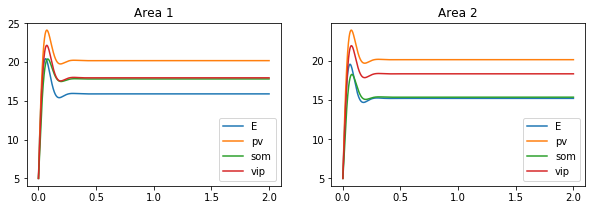

In [3]:

# no noise, first consider no gating happening 
# - i.e. we want to make sure we have the fixed points we want

# 2 plots: v1 rates and v2 rates
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

timestep = 0.0001

iterations = 20000
v1_rates = np.zeros((iterations, 4))
v2_rates = np.zeros((iterations, 4))
times = np.linspace(0, iterations*timestep, iterations, endpoint=False)

v1_r = np.array([5.0, 5.0, 5.0, 5.0])
v2_r = np.array([5.0, 5.0, 5.0, 5.0])
for t in range(iterations):
    v1_rates[t,:] = v1_r
    v2_rates[t,:] = v2_r
    
    dv1r_dt = inverse_T*(((W - I) @ v1_r) + v1_u_FF + v1_u_TD_baseline + w_TD*(v2_r[0]))
    dv2r_dt = inverse_T*(((W - I) @ v2_r) + v2_u_FF_baseline + W_FF*(v1_r[0]) + v2_u_TD + v2_u_TD_baseline)

    v1_r += dv1r_dt*timestep
    v2_r += dv2r_dt*timestep

print("v1 fixed point: \n" + str(v1_r))
print("\nv2 fixed point: \n" + str(v2_r))
up_fixed_point_v1_r = v1_r.copy()
up_fixed_point_v2_r = v2_r.copy()

axes[0].plot(times, v1_rates[:,0])
axes[0].plot(times, v1_rates[:,1])
axes[0].plot(times, v1_rates[:,2])
axes[0].plot(times, v1_rates[:,3])
axes[0].legend(['E','pv','som','vip'])
axes[0].set_title("Area 1")

axes[1].plot(times, v2_rates[:,0])
axes[1].plot(times, v2_rates[:,1])
axes[1].plot(times, v2_rates[:,2])
axes[1].plot(times, v2_rates[:,3])
axes[1].legend(['E','pv','som','vip'])
axes[1].set_title("Area 2")

plt.show()

v1 fixed point: 
[0.99347611 9.78802337 7.35111976 8.19437844]

v2 fixed point: 
[ 6.63382023 10.25089165  6.61666815 10.17555694]


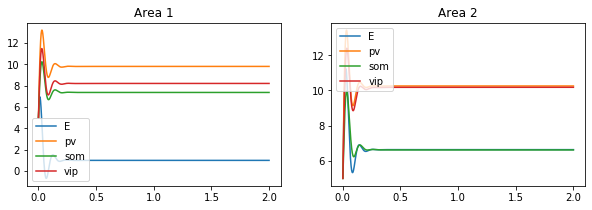

In [4]:
# no noise, with gating
# - i.e. we want to make sure we have the fixed points we want

# 2 plots: v1 rates and v2 rates
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

timestep = 0.0001

iterations = 20000
v1_rates = np.zeros((iterations, 4))
v2_rates = np.zeros((iterations, 4))
times = np.linspace(0, iterations*timestep, iterations, endpoint=False)

v1_r = np.array([5.0, 5.0, 5.0, 5.0])
v2_r = np.array([5.0, 5.0, 5.0, 5.0])

gated_v2_u_TD = v2_u_TD.copy()
#gated_v2_u_TD[0] = 0.0
for t in range(iterations):
    v1_rates[t,:] = v1_r
    v2_rates[t,:] = v2_r
    
    gated_v1_u_TD = w_TD*(v2_r[0])
    gated_v1_u_TD[0] = 0.0 # <- apply the gating

    dv1r_dt = inverse_T*(((W - I) @ v1_r) + v1_u_FF + v1_u_TD_baseline + gated_v1_u_TD) # less top down input to pyr neurons (gated)
    dv2r_dt = inverse_T*(((W - I) @ v2_r) + v2_u_FF_baseline + W_FF*(v1_r[0]) + gated_v2_u_TD + v2_u_TD_baseline)

    v1_r += dv1r_dt*timestep
    v2_r += dv2r_dt*timestep

print("v1 fixed point: \n" + str(v1_r))
print("\nv2 fixed point: \n" + str(v2_r))

down_fixed_point_v1_r = v1_r.copy()
down_fixed_point_v2_r = v2_r.copy()

axes[0].plot(times, v1_rates[:,0])
axes[0].plot(times, v1_rates[:,1])
axes[0].plot(times, v1_rates[:,2])
axes[0].plot(times, v1_rates[:,3])
axes[0].legend(['E','pv','som','vip'])
axes[0].set_title("Area 1")

axes[1].plot(times, v2_rates[:,0])
axes[1].plot(times, v2_rates[:,1])
axes[1].plot(times, v2_rates[:,2])
axes[1].plot(times, v2_rates[:,3])
axes[1].legend(['E','pv','som','vip'])
axes[1].set_title("Area 2")

plt.show()

Defining a gating function:

In [5]:
### construct f with some appropriate m,c parameters

# how close the som rate in either the up or down state is to the gating threshold:
som_up_dist = 10.0 #  + 10
som_down_dist = 5.8 #  - 10
#som_up_dist = -15.5
#som_down_dist = 10.5

up_v1_r_som = up_fixed_point_v1_r[2]
up_v1_u_TD = (up_fixed_point_v2_r*w_TD)[0] # part of u_TD to pyr neurons only
print("up x,y: " + str(up_v1_r_som) + ", " + str(up_v1_u_TD))

down_v1_r_som = down_fixed_point_v1_r[2]
down_v1_u_TD = (down_fixed_point_v2_r*w_TD)[0] # part of u_TD to pyr neurons only
print("down x,y: " + str(down_v1_r_som) + ", " + str(down_v1_u_TD))

m = (up_v1_u_TD - down_v1_u_TD) / ((up_v1_r_som + som_up_dist) - (down_v1_r_som  - som_down_dist))
c = up_v1_u_TD - (m*(up_v1_r_som + som_up_dist))
print("m: " + str(m))
print("c: " + str(c))

def f(v1_r_som, top_down_input):
    return (1 / (1 + np.e**(1.3*((m*v1_r_som + c) - top_down_input))))
# check
print(f(up_v1_r_som, up_v1_u_TD))
print(f(down_v1_r_som, down_v1_u_TD))

up x,y: 17.809662758175566, 13.67677361230666
down x,y: 7.3511197569363125, 5.970438205571247
m: 0.29347917005036106
c: 5.515216866656859
0.9784423095905483
0.09860399127082405


In [31]:
### no dependance on SOM firing rate

up_v1_r_som = up_fixed_point_v1_r[2]
up_v1_u_TD = (up_fixed_point_v2_r*w_TD)[0] # part of u_TD to pyr neurons only
print("up x,y: " + str(up_v1_r_som) + ", " + str(up_v1_u_TD))

down_v1_r_som = down_fixed_point_v1_r[2]
down_v1_u_TD = (down_fixed_point_v2_r*w_TD)[0] # part of u_TD to pyr neurons only
print("down x,y: " + str(down_v1_r_som) + ", " + str(down_v1_u_TD))

mid_u_TD = up_v1_u_TD - 0.5*(up_v1_u_TD - down_v1_u_TD)
shift = -1.45
print(mid_u_TD + shift)
def f(v1_r_som, top_down_input):
    return (1 / (1 + np.e**(0.6*(mid_u_TD + shift - top_down_input))))


up x,y: 17.809662758175566, 13.67677361230666
down x,y: 7.3511197569363125, 5.970438205571247
8.373605908938954


up x,y: 17.809662758175566, 13.67677361230666
down x,y: 7.3511197569363125, 5.970438205571247
8.373605908938954


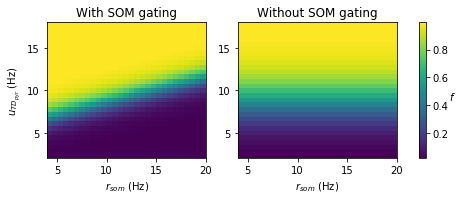

In [8]:
### no dependance on SOM firing rate

up_v1_r_som = up_fixed_point_v1_r[2]
up_v1_u_TD = (up_fixed_point_v2_r*w_TD)[0] # part of u_TD to pyr neurons only
print("up x,y: " + str(up_v1_r_som) + ", " + str(up_v1_u_TD))

down_v1_r_som = down_fixed_point_v1_r[2]
down_v1_u_TD = (down_fixed_point_v2_r*w_TD)[0] # part of u_TD to pyr neurons only
print("down x,y: " + str(down_v1_r_som) + ", " + str(down_v1_u_TD))

mid_u_TD = up_v1_u_TD - 0.5*(up_v1_u_TD - down_v1_u_TD)
shift = -1.45
print(mid_u_TD + shift)
def g(v1_r_som, top_down_input):
    return (1 / (1 + np.e**(0.6*(mid_u_TD + shift - top_down_input))))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,2.5))

soms = np.linspace(4, 20, 30)
u_TDs = np.linspace(2, 18, 30)
fs = np.array([[f(s, u) for s in soms] for u in u_TDs])
gs = np.array([[g(s, u) for s in soms] for u in u_TDs])

axes[0].pcolormesh(soms, u_TDs, fs)
cs = axes[1].pcolormesh(soms, u_TDs, gs)

fig.subplots_adjust(right=0.8)
cb = fig.colorbar(cs, ax=axes.ravel().tolist())
cb.set_label("$f$", rotation=0)

axes[0].set_title("With SOM gating")
axes[1].set_title("Without SOM gating")
axes[0].set_ylabel("$u_{TD_{pyr}}$ (Hz)")
axes[0].set_xlabel("$r_{som}$ (Hz)")
#axes[1].set_ylabel("$u_{TD_{pyr}}$ (Hz)")
axes[1].set_xlabel("$r_{som}$ (Hz)")
plt.show()

Now run some simulations:

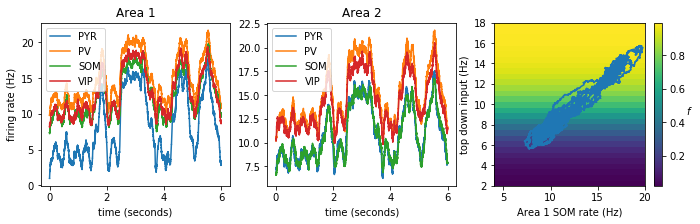

In [35]:
### run model with gating functions and noise - hopefully see state transitions...

# 2 plots: v1 rates and v2 rates
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11.5,3))



timestep = 0.0002

iterations = 30000
noise_amount = 2.5

#v1_r = up_fixed_point_v1_r.copy()
#v2_r = up_fixed_point_v2_r.copy()

v1_r = down_fixed_point_v1_r.copy()
v2_r = down_fixed_point_v2_r.copy()

v1_rates = np.zeros((iterations, 4))
v2_rates = np.zeros((iterations, 4))
times = np.linspace(0, iterations*timestep, iterations, endpoint=False)
u_TD = np.zeros(4)

gated_v2_u_TD = v2_u_TD.copy()
for t in range(iterations):
    v1_rates[t,:] = v1_r
    v2_rates[t,:] = v2_r

    gated_v1_u_TD = w_TD*(v2_r[0])
    gated_v1_u_TD[0] = f(v1_r[2], gated_v1_u_TD[0]) * gated_v1_u_TD[0] # <- apply the gating

    dv1r_dt = inverse_T*(((W - I) @ v1_r) + v1_u_FF + v1_u_TD_baseline + gated_v1_u_TD)
    dv2r_dt = inverse_T*(((W - I) @ v2_r) + v2_u_FF_baseline + W_FF*(v1_r[0]) + v2_u_TD_baseline + gated_v2_u_TD)
    
    v1_r += dv1r_dt*timestep + (np.sqrt(timestep)*np.random.randn(4)*noise_amount)
    v2_r += dv2r_dt*timestep + (np.sqrt(timestep)*np.random.randn(4)*noise_amount)

axes[0].plot(times, v1_rates[:,0])
axes[0].plot(times, v1_rates[:,1])
axes[0].plot(times, v1_rates[:,2])
axes[0].plot(times, v1_rates[:,3])
axes[0].legend(['PYR','PV','SOM','VIP'])
axes[0].set_title("Area 1")
axes[0].set_ylabel("firing rate (Hz)")
axes[0].set_xlabel("time (seconds)")

axes[1].plot(times, v2_rates[:,0])
axes[1].plot(times, v2_rates[:,1])
axes[1].plot(times, v2_rates[:,2])
axes[1].plot(times, v2_rates[:,3])
axes[1].legend(['PYR','PV','SOM','VIP'])
axes[1].set_title("Area 2")
axes[1].set_xlabel("time (seconds)")

soms = np.linspace(4, 20, 30)
u_TDs = np.linspace(2, 18, 30)
fs = np.array([[f(s, u) for s in soms] for u in u_TDs])
cs = axes[2].pcolormesh(soms, u_TDs, fs)
cb = fig.colorbar(cs, ax=axes[2])
cb.set_label("$f$", rotation=0)
axes[2].plot(v1_rates[:,2], w_TD[0]*v2_rates[:,0])
axes[2].set_ylabel("top down input (Hz)")
axes[2].set_xlabel("Area 1 SOM rate (Hz)")
plt.show()

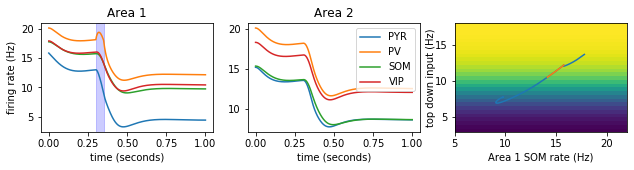

In [39]:
### Activate a specific neuron type: cause up-to-down transition ###

# 2 plots: v1 rates and v2 rates
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10.5,2))



timestep = 0.0001

iterations = 10000
noise_amount = 0.0

v1_r = up_fixed_point_v1_r.copy()
v2_r = up_fixed_point_v2_r.copy()

#v1_r = down_fixed_point_v1_r.copy()
#v2_r = down_fixed_point_v2_r.copy()

v1_rates = np.zeros((iterations, 4))
v2_rates = np.zeros((iterations, 4))
times = np.linspace(0, iterations*timestep, iterations, endpoint=False)
u_TD = np.zeros(4)


manual_input = np.zeros(4)
input_start = 3000
input_end = 3500
rates_with_manual_input = np.zeros((input_end - input_start, 2))
gated_v2_u_TD = v2_u_TD.copy()
for t in range(iterations):
    v1_rates[t,:] = v1_r
    v2_rates[t,:] = v2_r

    if (t >= input_start and t < input_end):
        manual_input[1] = 3.0
        rates_with_manual_input[t - input_start, 0] = v1_r[2] # v1 som
        rates_with_manual_input[t - input_start, 1] = v2_r[0] # v2 pyr
    else:
        manual_input[1] = 0.0


    gated_v1_u_TD = w_TD*(v2_r[0])
    gated_v1_u_TD[0] = f(v1_r[2], gated_v1_u_TD[0]) * gated_v1_u_TD[0] # <- apply the gating

    dv1r_dt = inverse_T*(((W - I) @ v1_r) + v1_u_FF + v1_u_TD_baseline + gated_v1_u_TD + manual_input)
    dv2r_dt = inverse_T*(((W - I) @ v2_r) + v2_u_FF_baseline + W_FF*(v1_r[0]) + v2_u_TD_baseline + gated_v2_u_TD)
    
    v1_r += dv1r_dt*timestep + (np.sqrt(timestep)*np.random.randn(4)*noise_amount)
    v2_r += dv2r_dt*timestep + (np.sqrt(timestep)*np.random.randn(4)*noise_amount)

axes[0].plot(times, v1_rates[:,0])
axes[0].plot(times, v1_rates[:,1])
axes[0].plot(times, v1_rates[:,2])
axes[0].plot(times, v1_rates[:,3])
axes[0].axvspan(input_start*timestep, input_end*timestep, color='blue', alpha=0.2)
axes[0].set_title("Area 1")
axes[0].set_ylabel("firing rate (Hz)")
axes[0].set_xlabel("time (seconds)")

axes[1].plot(times, v2_rates[:,0])
axes[1].plot(times, v2_rates[:,1])
axes[1].plot(times, v2_rates[:,2])
axes[1].plot(times, v2_rates[:,3])
axes[1].legend(['PYR','PV','SOM','VIP'], )
axes[1].set_title("Area 2")
axes[1].set_xlabel("time (seconds)")

soms = np.linspace(5, 22, 30)
u_TDs = np.linspace(3, 18, 30)
fs = np.array([[f(s, u) for s in soms] for u in u_TDs])
axes[2].pcolormesh(soms, u_TDs, fs)
axes[2].plot(v1_rates[:,2], w_TD[0]*v2_rates[:,0])
axes[2].plot(rates_with_manual_input[:,0], w_TD[0]*rates_with_manual_input[:,1])
axes[2].set_ylabel("top down input (Hz)")
axes[2].yaxis.set_label_coords(-0.11, 0.5)
axes[2].set_xlabel("Area 1 SOM rate (Hz)")
plt.show()

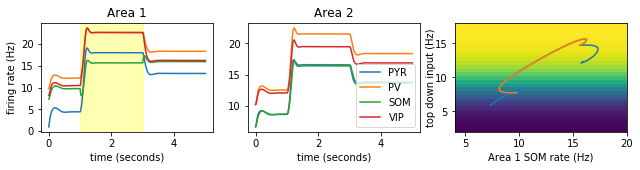

In [46]:
### Inhibit a specific neuron type: cause down-to-up transition

# 2 plots: v1 rates and v2 rates
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10.5,2))



timestep = 0.0002

iterations = 25000
noise_amount = 0.0

#v1_r = up_fixed_point_v1_r.copy()
#v2_r = up_fixed_point_v2_r.copy()

v1_r = down_fixed_point_v1_r.copy()
v2_r = down_fixed_point_v2_r.copy()

v1_rates = np.zeros((iterations, 4))
v2_rates = np.zeros((iterations, 4))
times = np.linspace(0, iterations*timestep, iterations, endpoint=False)
u_TD = np.zeros(4)


manual_input = np.zeros(4)
input_start = 5000
input_end = 15000
rates_with_manual_input = np.zeros((input_end - input_start, 2))

gated_v2_u_TD = v2_u_TD.copy()
for t in range(iterations):
    v1_rates[t,:] = v1_r
    v2_rates[t,:] = v2_r

    if (t >= input_start and t < input_end):
        manual_input[2] = -2.0
        rates_with_manual_input[t - input_start, 0] = v1_r[2] # v1 som
        rates_with_manual_input[t - input_start, 1] = v2_r[0] # v2 pyr
    else:
        manual_input[2] = 0.0


    gated_v1_u_TD = w_TD*(v2_r[0])
    gated_v1_u_TD[0] = f(v1_r[2], gated_v1_u_TD[0]) * gated_v1_u_TD[0] # <- apply the gating

    dv1r_dt = inverse_T*(((W - I) @ v1_r) + v1_u_FF + v1_u_TD_baseline + gated_v1_u_TD + manual_input)
    dv2r_dt = inverse_T*(((W - I) @ v2_r) + v2_u_FF_baseline + W_FF*(v1_r[0]) + v2_u_TD_baseline + gated_v2_u_TD)
    
    v1_r += dv1r_dt*timestep + (np.sqrt(timestep)*np.random.randn(4)*noise_amount)
    v2_r += dv2r_dt*timestep + (np.sqrt(timestep)*np.random.randn(4)*noise_amount)

axes[0].plot(times, v1_rates[:,0])
axes[0].plot(times, v1_rates[:,1])
axes[0].plot(times, v1_rates[:,2])
axes[0].plot(times, v1_rates[:,3])
axes[0].axvspan(input_start*timestep, input_end*timestep, color='yellow', alpha=0.3)
axes[0].set_title("Area 1")
axes[0].set_ylabel("firing rate (Hz)")
axes[0].set_xlabel("time (seconds)")

axes[1].plot(times, v2_rates[:,0])
axes[1].plot(times, v2_rates[:,1])
axes[1].plot(times, v2_rates[:,2])
axes[1].plot(times, v2_rates[:,3])
axes[1].legend(['PYR','PV','SOM','VIP'])
axes[1].set_title("Area 2")
axes[1].set_xlabel("time (seconds)")

soms = np.linspace(4, 20, 30)
u_TDs = np.linspace(2, 18, 30)
fs = np.array([[f(s, u) for s in soms] for u in u_TDs])
axes[2].pcolormesh(soms, u_TDs, fs)
axes[2].plot(v1_rates[:,2], w_TD[0]*v2_rates[:,0])
axes[2].plot(rates_with_manual_input[:,0], w_TD[0]*rates_with_manual_input[:,1])
axes[2].set_ylabel("top down input (Hz)")
axes[2].yaxis.set_label_coords(-0.11, 0.5)
axes[2].set_xlabel("Area 1 SOM rate (Hz)")
plt.show()

Paradoxical inhibition

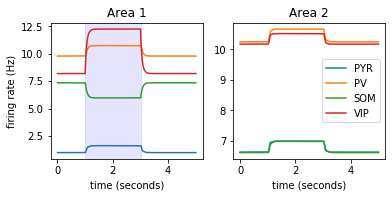

In [12]:
### Inhibit a specific neuron type: cause down-to-up transition

# 2 plots: v1 rates and v2 rates
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,2.5))



timestep = 0.0002

iterations = 25000
noise_amount = 0.0

#v1_r = up_fixed_point_v1_r.copy()
#v2_r = up_fixed_point_v2_r.copy()

v1_r = down_fixed_point_v1_r.copy()
v2_r = down_fixed_point_v2_r.copy()

v1_rates = np.zeros((iterations, 4))
v2_rates = np.zeros((iterations, 4))
times = np.linspace(0, iterations*timestep, iterations, endpoint=False)
u_TD = np.zeros(4)


manual_input = np.zeros(4)
input_start = 5000
input_end = 15000
rates_with_manual_input = np.zeros((input_end - input_start, 2))

gated_v2_u_TD = v2_u_TD.copy()
for t in range(iterations):
    v1_rates[t,:] = v1_r
    v2_rates[t,:] = v2_r

    if (t >= input_start and t < input_end):
        manual_input[3] = 2.0
        rates_with_manual_input[t - input_start, 0] = v1_r[2] # v1 som
        rates_with_manual_input[t - input_start, 1] = v2_r[0] # v2 pyr
    else:
        manual_input[3] = 0.0


    gated_v1_u_TD = w_TD*(v2_r[0])
    #gated_v1_u_TD[0] = f(v1_r[2], gated_v1_u_TD[0]) * gated_v1_u_TD[0] # <- apply the gating
    gated_v1_u_TD[0] = 0 * gated_v1_u_TD[0]

    dv1r_dt = inverse_T*(((W - I) @ v1_r) + v1_u_FF + v1_u_TD_baseline + gated_v1_u_TD + manual_input)
    dv2r_dt = inverse_T*(((W - I) @ v2_r) + v2_u_FF_baseline + W_FF*(v1_r[0]) + v2_u_TD_baseline + gated_v2_u_TD)# + manual_input)
    
    v1_r += dv1r_dt*timestep + (np.sqrt(timestep)*np.random.randn(4)*noise_amount)
    v2_r += dv2r_dt*timestep + (np.sqrt(timestep)*np.random.randn(4)*noise_amount)

axes[0].plot(times, v1_rates[:,0])
axes[0].plot(times, v1_rates[:,1])
axes[0].plot(times, v1_rates[:,2])
axes[0].plot(times, v1_rates[:,3])
axes[0].axvspan(input_start*timestep, input_end*timestep, color='blue', alpha=0.1)
axes[0].set_title("Area 1")
axes[0].set_ylabel("firing rate (Hz)")
axes[0].set_xlabel("time (seconds)")

axes[1].plot(times, v2_rates[:,0])
axes[1].plot(times, v2_rates[:,1])
axes[1].plot(times, v2_rates[:,2])
axes[1].plot(times, v2_rates[:,3])
axes[1].legend(['PYR','PV','SOM','VIP'])
axes[1].set_title("Area 2")
axes[1].set_xlabel("time (seconds)")

plt.show()

Other tests

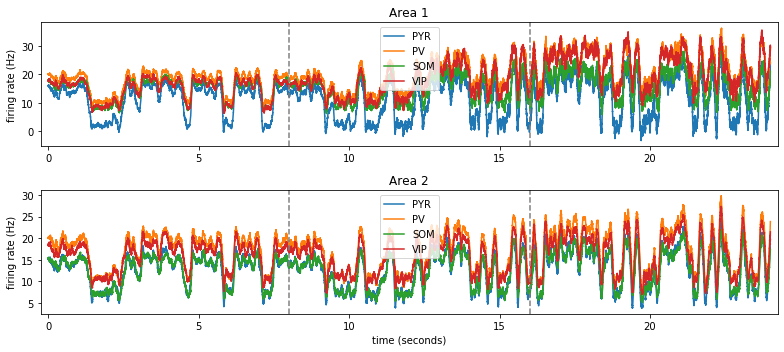

In [29]:
### run model with gating functions and noise - hopefully see state transitions...

# 2 plots: v1 rates and v2 rates
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11,5))

extra_external_input = np.array([8.0, 10.0, 5.0, 8.0])


timestep = 0.0002

iterations = 120000
noise_amount = 4

input_multipliers = np.zeros(iterations)
inc_start = iterations//3
input_multipliers[inc_start:(2*inc_start)] = np.linspace(0, 1, inc_start)
input_multipliers[2*inc_start:] = 1

noise_amounts = np.ones(iterations)*3
noise_amounts[inc_start:(2*inc_start)] = np.linspace(3, 12, inc_start)
noise_amounts[2*inc_start:] = 12

v1_r = up_fixed_point_v1_r.copy()
v2_r = up_fixed_point_v2_r.copy()

#v1_r = down_fixed_point_v1_r.copy()
#v2_r = down_fixed_point_v2_r.copy()

v1_rates = np.zeros((iterations, 4))
v2_rates = np.zeros((iterations, 4))
times = np.linspace(0, iterations*timestep, iterations, endpoint=False)
u_TD = np.zeros(4)

gated_v2_u_TD = v2_u_TD.copy()
for t in range(iterations):
    v1_rates[t,:] = v1_r
    v2_rates[t,:] = v2_r

    gated_v1_u_TD = w_TD*(v2_r[0])
    gated_v1_u_TD[0] = f(v1_r[2], gated_v1_u_TD[0]) * gated_v1_u_TD[0] # <- apply the gating

    dv1r_dt = inverse_T*(((W - I) @ v1_r) + v1_u_FF + v1_u_TD_baseline + gated_v1_u_TD + input_multipliers[t]*extra_external_input)
    dv2r_dt = inverse_T*(((W - I) @ v2_r) + v2_u_FF_baseline + W_FF*(v1_r[0]) + v2_u_TD_baseline + gated_v2_u_TD)# + input_multipliers[t]*extra_external_input)
    
    v1_r += dv1r_dt*timestep + (np.sqrt(timestep)*np.random.randn(4)*noise_amounts[t])
    v2_r += dv2r_dt*timestep + (np.sqrt(timestep)*np.random.randn(4)*noise_amounts[0])#*noise_amounts[t])

axes[0].plot(times, v1_rates[:,0])
axes[0].plot(times, v1_rates[:,1])
axes[0].plot(times, v1_rates[:,2])
axes[0].plot(times, v1_rates[:,3])
axes[0].legend(['PYR','PV','SOM','VIP'])
axes[0].axvline(x=inc_start*timestep, color="grey", ls='--')
axes[0].axvline(x=2*inc_start*timestep, color="grey", ls='--')
axes[0].margins(x=0.01)
axes[0].set_title("Area 1")
axes[0].set_ylabel("firing rate (Hz)")

axes[1].plot(times, v2_rates[:,0])
axes[1].plot(times, v2_rates[:,1])
axes[1].plot(times, v2_rates[:,2])
axes[1].plot(times, v2_rates[:,3])
axes[1].axvline(x=inc_start*timestep, color="grey", ls='--')
axes[1].axvline(x=2*inc_start*timestep, color="grey", ls='--')
axes[1].margins(x=0.01)
axes[1].legend(['PYR','PV','SOM','VIP'])
axes[1].set_title("Area 2")
axes[1].set_ylabel("firing rate (Hz)")
axes[1].set_xlabel("time (seconds)")
plt.tight_layout()
plt.show()


In [27]:
print("means")
print(np.mean(v1_rates[0:inc_start], axis=0)) # synchronized
print(np.mean(v1_rates[2*inc_start:], axis=0)) # desynchronized

print("standard deviations")
print(np.std(v1_rates[0:inc_start], axis=0)) # synchronized
print(np.std(v1_rates[2*inc_start:], axis=0)) # desynchronized

means
[ 6.74294006 13.80510735 11.43151416 11.96779463]
[22.46087414 31.08207409 22.27311877 22.59679312]
standard deviations
[5.86601449 4.18961043 4.01847247 4.05495759]
[4.25229269 3.11797068 2.7310107  3.69816109]


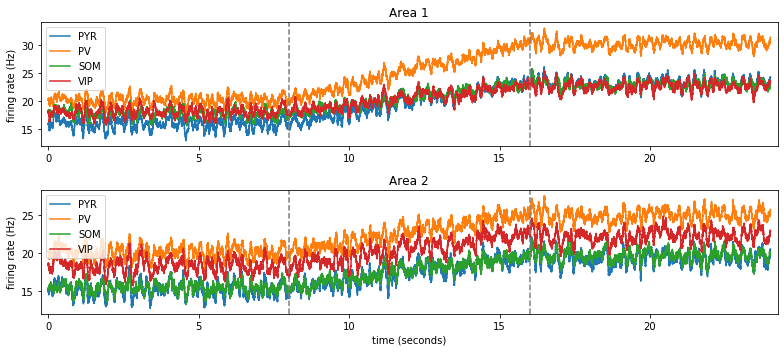

In [35]:
# 2 plots: v1 rates and v2 rates
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11,5))


extra_external_input = np.array([8.0, 8.0, 0.0, 0.0])


timestep = 0.0002

iterations = 120000
noise_amount = 4

input_multipliers = np.zeros(iterations)
inc_start = iterations//3
input_multipliers[inc_start:(2*inc_start)] = np.linspace(0, 1, inc_start)
input_multipliers[2*inc_start:] = 1

noise_amounts = np.ones(iterations)*3
noise_amounts[inc_start:(2*inc_start)] = np.linspace(3, 3, inc_start)
noise_amounts[2*inc_start:] = 3

v1_r = up_fixed_point_v1_r.copy()
v2_r = up_fixed_point_v2_r.copy()

#v1_r = down_fixed_point_v1_r.copy()
#v2_r = down_fixed_point_v2_r.copy()

v1_rates = np.zeros((iterations, 4))
v2_rates = np.zeros((iterations, 4))
times = np.linspace(0, iterations*timestep, iterations, endpoint=False)
u_TD = np.zeros(4)

gated_v2_u_TD = v2_u_TD.copy()
for t in range(iterations):
    v1_rates[t,:] = v1_r
    v2_rates[t,:] = v2_r

    gated_v1_u_TD = w_TD*(v2_r[0])
    #gated_v1_u_TD[0] = f(v1_r[2], gated_v1_u_TD[0]) * gated_v1_u_TD[0] # <- apply the gating

    dv1r_dt = inverse_T*(((W - I) @ v1_r) + v1_u_FF + v1_u_TD_baseline + gated_v1_u_TD + input_multipliers[t]*extra_external_input)
    dv2r_dt = inverse_T*(((W - I) @ v2_r) + v2_u_FF_baseline + W_FF*(v1_r[0]) + v2_u_TD_baseline + gated_v2_u_TD)# + input_multipliers[t]*extra_external_input)

    v1_r += dv1r_dt*timestep + (np.sqrt(timestep)*np.random.randn(4)*noise_amounts[t])
    v2_r += dv2r_dt*timestep + (np.sqrt(timestep)*np.random.randn(4)*noise_amounts[0])


axes[0].plot(times, v1_rates[:,0])
axes[0].plot(times, v1_rates[:,1])
axes[0].plot(times, v1_rates[:,2])
axes[0].plot(times, v1_rates[:,3])
axes[0].legend(['PYR','PV','SOM','VIP'])
axes[0].axvline(x=inc_start*timestep, color="grey", ls='--')
axes[0].axvline(x=2*inc_start*timestep, color="grey", ls='--')
axes[0].margins(x=0.01)
axes[0].set_title("Area 1")
axes[0].set_ylabel("firing rate (Hz)")

axes[1].plot(times, v2_rates[:,0])
axes[1].plot(times, v2_rates[:,1])
axes[1].plot(times, v2_rates[:,2])
axes[1].plot(times, v2_rates[:,3])
axes[1].axvline(x=inc_start*timestep, color="grey", ls='--')
axes[1].axvline(x=2*inc_start*timestep, color="grey", ls='--')
axes[1].margins(x=0.01)
axes[1].legend(['PYR','PV','SOM','VIP'])
axes[1].set_title("Area 2")
axes[1].set_ylabel("firing rate (Hz)")
axes[1].set_xlabel("time (seconds)")
plt.tight_layout()
plt.show()